In [1]:
import scipy as sc
from dateutil import parser
import isodate
import cufflinks as cf
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('sdmn_channels.csv')

In [3]:
df2 = pd.read_csv('video_details.csv')

In [4]:
mm7games = df1[df1.channel_name=='MM7Games']

In [5]:
mm7games.reset_index(drop=True,inplace=True)
mm7games

,channel_name,description,publishedAt,total_views,subscribers,total_videos,playlists,publishedAtTime,publishedAtDate
0,MM7Games,2nd Channel for any games you want me to play!!,2013-09-14T18:19:43Z,2674162285,5190000,4719,UUjB_adDAIxOL8GA4Y4OCt8g,18:19:43,2013-09-14


In [6]:
mm7games_details = df2[df2.channel=='MM7Games']

In [7]:
mm7games_details.reset_index(drop=True,inplace=True)
mm7games_details.head()

,channel,video_id,title,description,categoryId,publishedAt,duration,tags,likes,views,comments,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength
0,MM7Games,nVmxLPbJOvw,BOXING WHILE DRUNK??,Who should I challenge to a drunk boxing match...,20,2022-09-26 17:01:33+00:00,PT11M26S,"['miniminter', 'mm7games', 'simon', 'random', ...",9207.0,202863,244.0,Monday,686.0,56,45.385309,1.202782,20
1,MM7Games,RCgmoDtcoj8,MINIMINTER LEARNS TO MAKE SUSHI!,What food should I learn to make next? \n\nMy ...,20,2022-09-25 15:33:03+00:00,PT28M3S,"['miniminter', 'mm7games', 'simon', 'random', ...",9959.0,222980,212.0,Sunday,1683.0,56,44.663198,0.950758,32
2,MM7Games,oI_rWyOw6Vk,SIDEMEN CHARITY MATCH BEST MOMENTS!,What is your Charity Match highlight moment?\n...,20,2022-09-24 10:00:36+00:00,PT11M16S,"['miniminter', 'mm7games', 'simon', 'random', ...",46468.0,1067128,746.0,Saturday,676.0,56,43.544917,0.699073,35
3,MM7Games,q4sPD-ldQ0s,FALL GUYS BUT IF WE FALL WE LOSE...,Give me another challenge to try!\n\nCheck out...,20,2022-09-23 17:13:36+00:00,PT16M55S,"['miniminter', 'mm7games', 'simon', 'random', ...",15261.0,348010,191.0,Friday,1015.0,56,43.852188,0.548835,35
4,MM7Games,fsL2CkSLM8Q,YOUTUBER KNOCKOUT PENALTIES!,Should I take a penalty at the Charity Match?\...,20,2022-09-22 17:20:23+00:00,PT8M2S,"['miniminter', 'mm7games', 'simon', 'random', ...",55373.0,1039374,481.0,Thursday,482.0,56,53.275337,0.462779,28


In [8]:
mm7games_details['year'] = pd.DatetimeIndex(mm7games_details['publishedAt']).year

In [9]:
mm7games_details.head()

,channel,video_id,title,description,categoryId,publishedAt,duration,tags,likes,views,comments,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,year
0,MM7Games,nVmxLPbJOvw,BOXING WHILE DRUNK??,Who should I challenge to a drunk boxing match...,20,2022-09-26 17:01:33+00:00,PT11M26S,"['miniminter', 'mm7games', 'simon', 'random', ...",9207.0,202863,244.0,Monday,686.0,56,45.385309,1.202782,20,2022
1,MM7Games,RCgmoDtcoj8,MINIMINTER LEARNS TO MAKE SUSHI!,What food should I learn to make next? \n\nMy ...,20,2022-09-25 15:33:03+00:00,PT28M3S,"['miniminter', 'mm7games', 'simon', 'random', ...",9959.0,222980,212.0,Sunday,1683.0,56,44.663198,0.950758,32,2022
2,MM7Games,oI_rWyOw6Vk,SIDEMEN CHARITY MATCH BEST MOMENTS!,What is your Charity Match highlight moment?\n...,20,2022-09-24 10:00:36+00:00,PT11M16S,"['miniminter', 'mm7games', 'simon', 'random', ...",46468.0,1067128,746.0,Saturday,676.0,56,43.544917,0.699073,35,2022
3,MM7Games,q4sPD-ldQ0s,FALL GUYS BUT IF WE FALL WE LOSE...,Give me another challenge to try!\n\nCheck out...,20,2022-09-23 17:13:36+00:00,PT16M55S,"['miniminter', 'mm7games', 'simon', 'random', ...",15261.0,348010,191.0,Friday,1015.0,56,43.852188,0.548835,35,2022
4,MM7Games,fsL2CkSLM8Q,YOUTUBER KNOCKOUT PENALTIES!,Should I take a penalty at the Charity Match?\...,20,2022-09-22 17:20:23+00:00,PT8M2S,"['miniminter', 'mm7games', 'simon', 'random', ...",55373.0,1039374,481.0,Thursday,482.0,56,53.275337,0.462779,28,2022


In [10]:
df_yearly_vids = mm7games_details.sort_values(['year','views'],ascending=[True, False])

In [11]:
df_yearly_vids.reset_index(drop=True,inplace=True)
df_yearly_vids

,channel,video_id,title,description,categoryId,publishedAt,duration,tags,likes,views,comments,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,year
0,MM7Games,Z4ZlP3LFor0,"GTA V Bike Fun (With Zerkaa, KSI, Vikkstar123,...",Become a Member: https://www.youtube.com/user/...,20,2013-12-12 19:00:02+00:00,PT9M33S,"['Grand Theft Auto V (Video Game)', 'gta', 'on...",8383.0,675885,130.0,Thursday,573.0,193,12.402998,0.192340,66,2013
1,MM7Games,ZYZtCMQTCgU,"GTA V Online Swag Bus (With Zerkaa, KSI, Vikks...",Become a Member: https://www.youtube.com/user/...,20,2013-12-27 20:00:01+00:00,PT6M53S,"['Grand Theft Auto V (Video Game)', 'Gta', 'sw...",10755.0,655436,217.0,Friday,413.0,198,16.408925,0.331077,78,2013
2,MM7Games,1uoygdYH1-E,Trouble In Terrorist Town | 'A new game' | (Ga...,Become a Member: https://www.youtube.com/user/...,20,2013-12-28 18:00:03+00:00,PT7M19S,"[""Garry's Mod (Video Game)"", 'gmod', 'prop', '...",6373.0,620735,147.0,Saturday,439.0,168,10.266861,0.236816,56,2013
3,MM7Games,hYZZ8SC3JzQ,GTA V Online | The Marathon Aftermath (With Ze...,Become a Member: https://www.youtube.com/user/...,20,2013-11-17 18:19:19+00:00,PT6M58S,"['Grand Theft Auto V (Video Game)', 'online', ...",7483.0,598738,95.0,Sunday,418.0,112,12.497954,0.158667,78,2013
4,MM7Games,2OJlcpforXM,"GTA V Online Group Fun #1 (With Zerkaa, TBJZL,...",Become a Member: https://www.youtube.com/user/...,20,2013-11-19 20:48:59+00:00,PT7M36S,"['Grand Theft Auto V (Video Game)', 'Video Gam...",7687.0,543335,250.0,Tuesday,456.0,143,14.147809,0.460121,73,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,MM7Games,QMzLFHx_sX0,MINIMINTER LISTENS TO MUSIC FOR 8 MINUTES...,Who wants my playlist?\nDidn't know what to do...,20,2022-04-01 16:45:01+00:00,PT8M2S,"['miniminter', 'mm7games', 'simon', 'random', ...",18263.0,208139,601.0,Friday,482.0,56,87.744248,2.887493,44,2022
4717,MM7Games,nVmxLPbJOvw,BOXING WHILE DRUNK??,Who should I challenge to a drunk boxing match...,20,2022-09-26 17:01:33+00:00,PT11M26S,"['miniminter', 'mm7games', 'simon', 'random', ...",9207.0,202863,244.0,Monday,686.0,56,45.385309,1.202782,20,2022
4718,MM7Games,yd6yR5Bmvxw,COOKING WITH ONLY 1 ARM!,Should we try this in real life? \n\nSub to th...,20,2022-09-14 17:09:03+00:00,PT12M20S,"['miniminter', 'mm7games', 'simon', 'random', ...",9539.0,202136,128.0,Wednesday,740.0,56,47.191000,0.633237,24,2022
4719,MM7Games,kis0LjvKt9w,WILL WE WIN THE LEAGUE?,Should we transfer to a new club? \n\nMy twitt...,20,2022-07-22 17:00:23+00:00,PT10M46S,"['miniminter', 'mm7games', 'simon', 'random', ...",9705.0,187247,208.0,Friday,646.0,56,51.829936,1.110832,23,2022


In [12]:
df_yearly_vids.categoryId.value_counts()

20    4715
22       5
24       1
Name: categoryId, dtype: int64

In [13]:
x = df_yearly_vids[['channel','year','title','description','views']]

In [14]:
x

,channel,year,title,description,views
0,MM7Games,2013,"GTA V Bike Fun (With Zerkaa, KSI, Vikkstar123,...",Become a Member: https://www.youtube.com/user/...,675885
1,MM7Games,2013,"GTA V Online Swag Bus (With Zerkaa, KSI, Vikks...",Become a Member: https://www.youtube.com/user/...,655436
2,MM7Games,2013,Trouble In Terrorist Town | 'A new game' | (Ga...,Become a Member: https://www.youtube.com/user/...,620735
3,MM7Games,2013,GTA V Online | The Marathon Aftermath (With Ze...,Become a Member: https://www.youtube.com/user/...,598738
4,MM7Games,2013,"GTA V Online Group Fun #1 (With Zerkaa, TBJZL,...",Become a Member: https://www.youtube.com/user/...,543335
...,...,...,...,...,...
4716,MM7Games,2022,MINIMINTER LISTENS TO MUSIC FOR 8 MINUTES...,Who wants my playlist?\nDidn't know what to do...,208139
4717,MM7Games,2022,BOXING WHILE DRUNK??,Who should I challenge to a drunk boxing match...,202863
4718,MM7Games,2022,COOKING WITH ONLY 1 ARM!,Should we try this in real life? \n\nSub to th...,202136
4719,MM7Games,2022,WILL WE WIN THE LEAGUE?,Should we transfer to a new club? \n\nMy twitt...,187247


In [15]:
ip = x.year.value_counts().sort_index()

In [16]:
years = list(ip.index)
video_count = list(ip.values)

In [17]:
avg_yearly_views = x.groupby(['channel','year'])['views'].sum()
avg_yearly_views = avg_yearly_views.copy().reset_index()
avg_yearly_views

,channel,year,views
0,MM7Games,2013,21764060
1,MM7Games,2014,306874105
2,MM7Games,2015,408888857
3,MM7Games,2016,486350829
4,MM7Games,2017,429201925
5,MM7Games,2018,224538247
6,MM7Games,2019,246470334
7,MM7Games,2020,223791092
8,MM7Games,2021,171245147
9,MM7Games,2022,155412439


In [18]:
# I divided by 1000, instead of 100 inorder to normalize both values
avg_yearly_views['view_rate_perc'] = round((avg_yearly_views['views']/[i*1000 for i in video_count]),4)
avg_yearly_views['view_rate_perc']

0    203.4024
1    431.6091
2    610.2819
3    671.7553
4    588.7544
5    492.4084
6    675.2612
7    623.3735
8    506.6424
9    593.1772
Name: view_rate_perc, dtype: float64

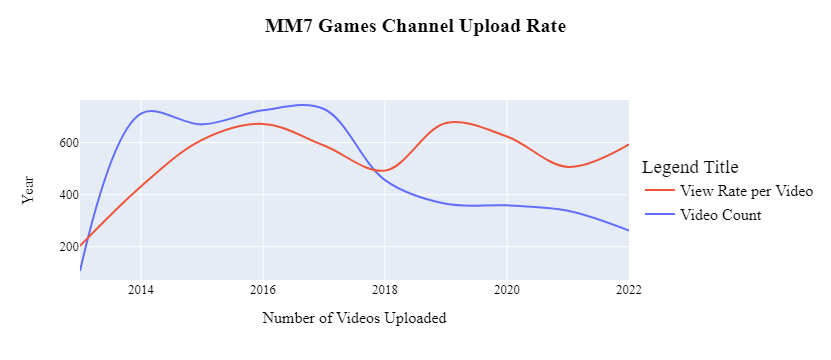

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=video_count, name="Video Count",text=video_count,hoverinfo='x+text',
                    line_shape='spline'))
fig.add_trace(go.Scatter(x=avg_yearly_views.year, y=avg_yearly_views['view_rate_perc'], name="View Rate per Video",
                         text=avg_yearly_views['view_rate_perc'],hoverinfo='x+text',
                    line_shape='spline'))
fig.update_traces(hoverinfo='name+text', mode='lines')
fig.update_layout(
     title=dict(
        text='<b>MM7 Games Channel Upload Rate</b>',
        x=0.5,
        y=0.95,
        xanchor='center',
        yanchor= 'top',
        font=dict(
            family="Oswald",
            size=20,
            color='#000000'
        )
    ),
    xaxis_title="Number of Videos Uploaded",
    yaxis_title="Year",
    legend=dict(y=0.5, traceorder='reversed', font_size=16),
    legend_title="Legend Title",
    font=dict(family="Oswald",size=13,color="Black")
)
fig.show()

#### Identifying trends in the content

Wordcloud - NLP

In [74]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
# nltk.download('stopwords')

In [21]:
# top 50 grossing videos of each year

In [146]:
d = {}
yearly_top_50 = pd.DataFrame()
for y in years:
    u = df_yearly_vids[df_yearly_vids.year==y]
    titles = []
    days = []
    desc = []
    f = {}
    gh = gh.append(u.iloc[:50])
    for i in range(50):
        titles.append(u.iloc[i]['title'])
        days.append(u.iloc[i]['pushblishDayName'])
        desc.append(u.iloc[i]['description'])
    f['title'] = titles
    f['days'] = days
    f['desc'] = desc
    d[y] = f

In [147]:
yearly_top_50.reset_index(drop=True,inplace=True)

In [76]:
d

{2013: {'title': ['GTA V Bike Fun (With Zerkaa, KSI, Vikkstar123, TBJZL and Behzinga)',
   'GTA V Online Swag Bus (With Zerkaa, KSI, Vikkstar123, JME, TBJZL and Behzinga)',
   "Trouble In Terrorist Town | 'A new game' | (Garry's Mod)",
   'GTA V Online | The Marathon Aftermath (With Zerkaa, KSIOlajidebt and Behzinga)',
   'GTA V Online Group Fun #1 (With Zerkaa, TBJZL, KSIOlajidebt and Behzinga)',
   "Prop Hunt 'The Movement' (Garry's Mod)",
   "Prop Hunt 'I'm On The Toilet' (Garry's Mod)",
   "Trouble In Terrorist Town | 'I'm good' | (Garry's Mod)",
   'GTA V Online | The Marathon #1 (With Zerkaa, TBJZL, KSIOlajidebt and Behzinga)',
   "Prop Hunt 'Serious?' (Garry's Mod)",
   'GTA V Online Shopping Shenanigans (With Zerkaa, KSI, Vikkstar123, TBJZL and Behzinga)',
   'GTA V Online Random Stuff (With Zerkaa, KSI, Vikkstar123, TBJZL and Behzinga)',
   "Prop Hunt 'FIRST TIME OUT' (Garry's Mod)",
   'GTA V Online Group Fun #12 (With Zerkaa, KSI, Vikkstar123, TBJZL and Behzinga)',
   "Prop 

In [77]:
gg = pd.DataFrame.from_records(d)

In [78]:
gg.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
title,"[GTA V Bike Fun (With Zerkaa, KSI, Vikkstar123...","[PORTAL 2 WITH ETHAN!, GTA 5 Funny Moments 'TH...","[1ST PLACE! BLOB WARS - AGAR, WE ARE BUSINESSM...","[JUST....WOW....., DESTROYING THE RACE!! (GTA ...",[BUILDING TO THE START ISLAND! (Fortnite Battl...,[NEW CHUG JUG UPDATE! (Fortnite Battle Royale)...,"[Are we a normal couple?, GIRLFRIEND PICKS MY ...",[MINIMINTER REACTS TO Tobi & Manny - Destined ...,"[REACTING TO UK VS USA TIKTOKS, How Well Does ...","[BECOMING RONALDO IN BITLIFE!, W2S MOST OUTRAG..."
days,"[Thursday, Friday, Saturday, Sunday, Tuesday, ...","[Saturday, Thursday, Sunday, Thursday, Saturda...","[Sunday, Friday, Wednesday, Monday, Tuesday, M...","[Thursday, Monday, Monday, Saturday, Tuesday, ...","[Sunday, Thursday, Sunday, Thursday, Wednesday...","[Friday, Friday, Saturday, Monday, Sunday, Fri...","[Saturday, Sunday, Monday, Tuesday, Wednesday,...","[Saturday, Friday, Monday, Sunday, Thursday, F...","[Wednesday, Monday, Saturday, Saturday, Saturd...","[Saturday, Sunday, Thursday, Saturday, Sunday,..."
desc,[Become a Member: https://www.youtube.com/user...,[Become a Member: https://www.youtube.com/user...,[Become a Member: https://www.youtube.com/user...,[Become a Member: https://www.youtube.com/user...,[Become a Member: https://www.youtube.com/user...,[Become a Member: https://www.youtube.com/user...,[Leave a like for more Videos with Talia!\nGo ...,[MAKE SURE YOU GO SUPPORT MY BROS:\nThe Song: ...,[Who do you think won? \nMy twitter: https://g...,[Who should I become next?\n\nMy twitter: http...


In [79]:
gg.loc['lem_titles'] = None

In [83]:
# Lemmen
sw = stopwords.words('english')
wds = words.words()
port_stem = PorterStemmer()
lem = WordNetLemmatizer()

def stemming(contents):
    contents = ' '.join(contents)
    lem_contents = re.sub(r'[^a-zA-Z]',' ',contents)
    lem_contents = lem_contents.lower()
    lem_contents =lem_contents.split()
    # lem_contents = [word for word in lem_contents if word in wds]
    # lem_contents = [lem.lemmatize(word) for word in lem_contents if word not in sw]
    # lem_contents = [port_stem.stem(word) for word in lem_contents if word not in sw]
    lem_contents = [word for word in lem_contents if word not in sw]
    lem_contents = ' '.join(lem_contents)
    return lem_contents

In [84]:
for y in years:
    gg.loc['lem_titles'][y] = stemming(gg.loc['title'][y])

In [85]:
gg.loc['lem_titles']

2013    gta v bike fun zerkaa ksi vikkstar tbjzl behzi...
2014    portal ethan gta funny moments races real side...
2015    st place blob wars agar businessmen monopoly c...
2016    wow destroying race gta online funny moments w...
2017    building start island fortnite battle royale b...
2018    new chug jug update fortnite battle royale min...
2019    normal couple girlfriend picks draft secrets t...
2020    miniminter reacts tobi manny destined greatnes...
2021    reacting uk vs usa tiktoks well talia know sid...
2022    becoming ronaldo bitlife w outrageous moments ...
Name: lem_titles, dtype: object

In [86]:
texts = list(gg.loc['lem_titles'].values)

In [87]:
lem_title_lens = []
for i in texts:
    lem_title_lens.append(len(i))

In [88]:
lem_title_lens

[2603, 2062, 1339, 988, 778, 1299, 1363, 1315, 1391, 1232]

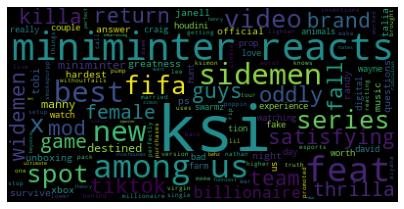

In [109]:
wc = WordCloud().generate_from_text(gg.loc['lem_titles'][2020])

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()  
x = vect.fit_transform(texts)

In [91]:
df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names(),index=years)
df

,aa,actually,aftermath,agar,aircraft,aiyana,akinator,album,almost,amazing,...,youtube,youtuber,youtubers,yungblud,zerkaa,zidane,zombie,zombies,zone,zweback
2013,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,36,0,0,0,0,1
2014,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,18,0,0,1,0,0
2015,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2018,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
2019,0,1,0,0,0,0,0,0,1,0,...,0,2,0,0,0,1,0,0,1,0
2020,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021,0,2,0,0,0,0,0,1,0,1,...,2,0,0,1,0,0,0,0,0,0
2022,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [92]:
df_t = df.T
df_t

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
aa,7,0,0,0,0,0,0,0,0,0
actually,0,0,0,1,0,0,1,0,2,0
aftermath,1,0,0,0,0,0,0,0,0,0
agar,0,0,4,0,0,0,0,0,0,0
aircraft,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
zidane,0,0,0,0,0,0,1,0,0,0
zombie,0,0,0,0,1,0,0,0,0,0
zombies,0,1,0,1,0,1,0,0,0,0
zone,0,0,0,0,0,0,1,0,0,0


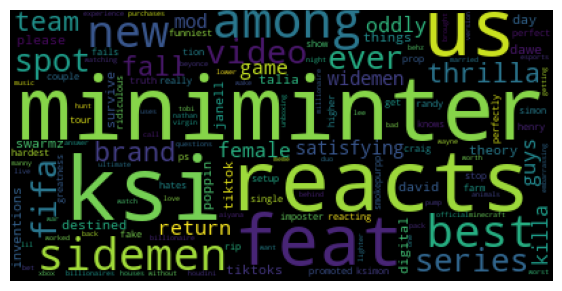

In [107]:
data = df_t[2020].sort_values(ascending=False)
wc = WordCloud().generate_from_frequencies(data)

plt.figure(figsize=(7,5),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

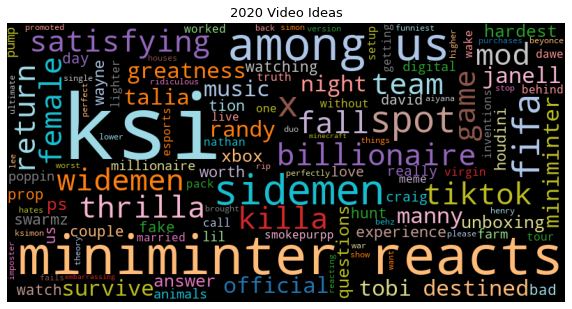

In [119]:
#Define a list of stop words
stopwords = ['guys', 'best', 'oddly', 'series', 'brand', 'new',
             'video', 'ever', 'feat','uses','knows','get','bet']

#A function to generate the word cloud from text
def generate_wordcloud(data, title):
    cloud = WordCloud(width=800,
                      height=400,
                      max_words=150,
                      # 'tab20c','PuBuGn'
                      colormap='tab20',
                      stopwords=stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()
    
#Use the function to generate the word cloud
generate_wordcloud(gg.loc['lem_titles'][2020], '2020 Video Ideas')

In [123]:
among_us = np.array(Image.open('au2.png'))

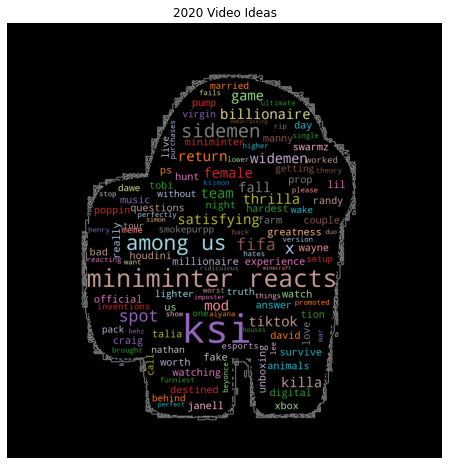

In [141]:
def generate_better_wordcloud(data, title, mask=None):
    cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap='tab20',
                      mask=mask,
                      background_color='black',
                      stopwords=stopwords,
                      collocations=True,
                      contour_color='grey',
                      contour_width=3).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Use the function with the rome_corpus and our mask to create word cloud     
generate_better_wordcloud(gg.loc['lem_titles'][2020], '2020 Video Ideas', mask=among_us)

In [35]:
df = pd.read_csv('channel_metrics.csv')

In [36]:
# I will take 

In [37]:
df1 = df[df.channel=='MM7Games']

In [38]:
df1.head()
df = df1

In [39]:
x = np.asarray(df.durationSecs).reshape(-1,1)
y = np.asarray(df.views).reshape(-1,1)

In [40]:
x_train,x_test,y_train,y_test = tt(x,y,train_size=0.8,random_state=0)

In [41]:
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

train_error = r2_score(y_train,y_train_pred)
test_error = r2_score(y_test,y_test_pred)
print('Error in train:',train_error)
print('Error in test:',test_error)

Error in train: 0.48339656056328417
Error in test: -0.28844533986411114


<AxesSubplot:>

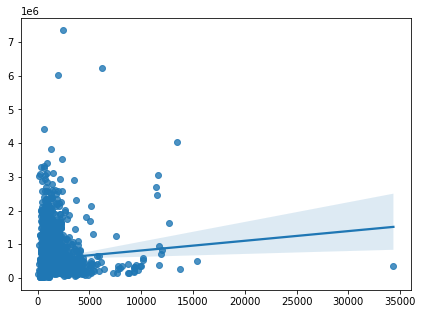

In [42]:
plt.figure(figsize=(7,5))
sns.regplot(x=x_train, y=y_train)

In [43]:
x = np.asarray(df.year).reshape(-1,1)
y = np.asarray(df.views).reshape(-1,1)

In [44]:
x_train,x_test,y_train,y_test = tt(x,y,train_size=0.8,random_state=0)

In [45]:
x_train,x_test,y_train,y_test = tt(x,y,train_size=0.8,random_state=0)
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

train_error = r2_score(y_train,y_train_pred)
test_error = r2_score(y_test,y_test_pred)
print('Error in train:',train_error)
print('Error in test:',test_error)

Error in train: 0.04963969828990811
Error in test: 0.012798139059058133


<AxesSubplot:>

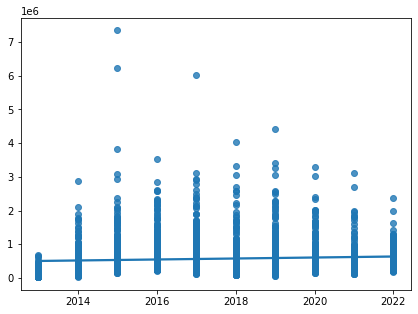

In [46]:
plt.figure(figsize=(7,5))
sns.regplot(x=x_train, y=y_train)

In [47]:
df.fillna(0,inplace=True)

In [48]:
x = np.asarray(df.views).reshape(-1,1)
y = np.asarray(df.likes).reshape(-1,1)

In [49]:
x_train,x_test,y_train,y_test = tt(x,y,train_size=0.8,random_state=0)

In [50]:
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

train_error = r2_score(y_train,y_train_pred)
test_error = r2_score(y_test,y_test_pred)
print('Error in train:',train_error)
print('Error in test:',test_error)

Error in train: 0.9042706663973388
Error in test: 0.3753549644632094


<AxesSubplot:>

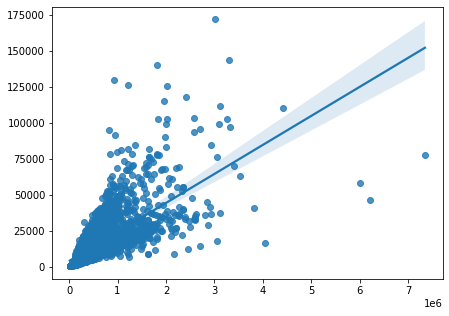

In [51]:
plt.figure(figsize=(7,5))
sns.regplot(x=x_train, y=y_train)

In [52]:
x = np.asarray(df.views).reshape(-1,1)
y = np.asarray(df.comments).reshape(-1,1)

In [53]:
x_train,x_test,y_train,y_test = tt(x,y,train_size=0.8,random_state=0)

In [54]:
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)
y_train_pred = rf_reg.predict(x_train)
y_test_pred = rf_reg.predict(x_test)

train_error = r2_score(y_train,y_train_pred)
test_error = r2_score(y_test,y_test_pred)
print('Error in train:',train_error)
print('Error in test:',test_error)

Error in train: 0.8444565841907534
Error in test: -0.1733411461814618


<AxesSubplot:>

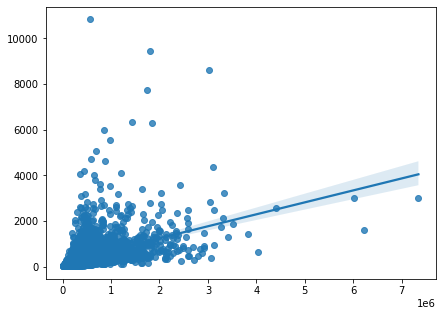

In [55]:
plt.figure(figsize=(7,5))
sns.regplot(x=x_train, y=y_train)